In [4]:
C_map=[(1,1,0.75),                  #  0
        (0.50588,0.99608,0.78824), #   1     
        (1,0.80196,0.2),#              2
        (1,0.4, 0),                #     3
        (1,0.4, 0),         #             4
        (0.75294, 0.75294, 0.75294), #    5
        (0.50196, 0.50196, 0.50196),  #   6   
        (0, 0.50196, 0),              #   7
        (0, 0.84314, 0),              #   8    
        (0, 0, 0.71765),              #   9
        (0.486, 0.388, 0.898),        #  10
        (0.8, 0.85, 0.99216),         #   11 
        (0.3, 0.7, 1),                #   12
        (0.25, 0.25, 1),              #   13
        (0.522, 0.263, 0.969),        #   14 %        0.5 0.2 0.2;...         14
        (0.8, 0.6, 0),                #   15
        (1, 0.8, 0.8),                #   16
        (0.99, 0.4, 0.4),             #   17        
        (0.6705882, 0.9, 0.5),        #   18
        (1, 1, 1),                    #       19 -               
        (0.6, 0.6, 0.6),              #   	20 -
        (0, 0, 0),                    #       21 -
        (0, 0, 0),                    #       22 -
        (1, 1, 0.31765),              #   23
        (1, 0.90196, 0.18824),        #   24
        (0.6, 0.6, 0.2),               #  25
        (0.4, 0.4, 0),                  # 26
        (0.9, 0.012, 0.78),            #  27
        (1, 0.43922, 0.99608),         #  28
        (1, 1, 1),                     #      29 -
        (1, 0, 0),                     #  30
        (1, 0, 0),                     #      31 -
        (0.55, 0, 0.8),                #  32
        (0, 0, 0),                     #     33 -
        (0.831, 0.69, 0.98),            #  34
        (0.988, 0.776, 0.357),    #     	35 -
        (0, 0.298, 0.267),          #     36
        (0, 0.298, 0.659),           #    37
        (0, 0.812, 0.453)]          #   38
    


In [5]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D as axes3d

In [6]:

fp = open("./voacc150.txt")
for i, line in enumerate(fp):
    if i == 1: 
        splitted = line.split(' ')
        nx, ny = list(filter(lambda c: c!='' and c !='\n', splitted))
    if i == 2:
        data = np.array(list(map(lambda d: int(d), filter(lambda c: c!='' and c !='\n', line.split(' ')))))
fp.close()
data.shape

(76263,)

In [7]:
from matplotlib import pyplot as plt

In [8]:
def parse_voacc(Data_vec):
    color_grid = np.zeros(shape=(401,4001))
    num       = 0;
    ind_vec1 = ind_vec2 = 0
    ind       = 0;
    while num<len(Data_vec):
        value = Data_vec[num]
        if value==-2:
            #Compressed: the next ?? indices are given the color material
            num_colors  =   Data_vec[num+1]
            material    =   Data_vec[num+2]
            ind_vec1 = ind;
            ind_vec2 = ind + num_colors - 1;
            ind         =   ind + num_colors
            num         =   num + 3
        else:
            if value==-1:
                material    =   0
            else:
                material    =   value
            ind_vec2 = ind
            ind_vec1 = ind
            ind = ind + 1
            num = num + 1
        for n in range(ind_vec1, ind_vec2+1):
            jj = int(n / 401)
            ii = int(n % 401)
            color_grid[ii][jj] = material
    return color_grid

In [9]:
res = parse_voacc(data)

In [10]:
pd.isnull(res).sum()

NameError: name 'pd' is not defined

In [13]:
from matplotlib import colors, patches

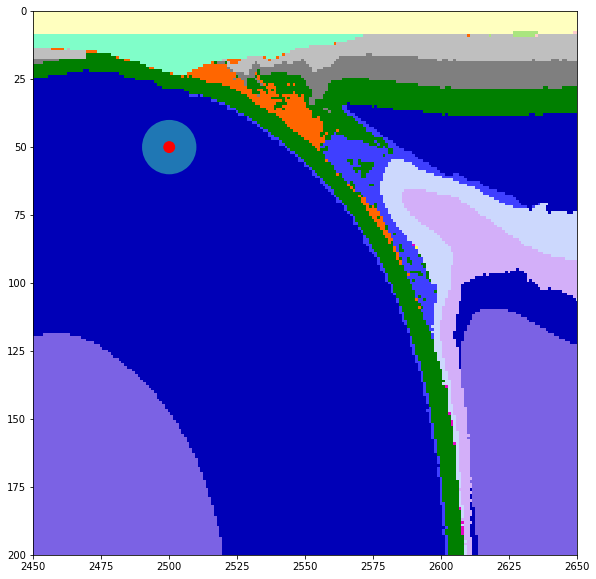

In [20]:
cmap = colors.ListedColormap(C_map)
plt.figure(figsize=(20,10))
bounds=list(range(0,39))
norm = colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(res, norm=norm, cmap=cmap)
plt.xlim(2450,2650)
plt.ylim(0,200)
ax = plt.gca()

circle = patches.Circle((2500, 50), radius = 10)
circle2 = patches.Circle((2500, 50),radius = 2, color = 'r')
ax.add_patch(circle)
ax.add_patch(circle2)
ax.invert_yaxis()

In [ ]:
xx, yy = np.meshgrid(np.linspace(0,1,4001), np.linspace(0,1,401))
zz = np.zeros(shape=(401,4001))
# create the figure
fig = plt.figure(figsize=(20,10))

# show the reference image
ax1 = fig.add_subplot(121)
ax1.imshow(res, cmap=cmap, norm=norm)

# show the 3D rotated projection
ax2 = fig.add_subplot(122, projection='3d')
cset = ax2.plot_surface(xx, yy, res, cmap=cmap, norm=norm, rstride=1, cstride=1, shade=False)

# ax2.set_xlim((2450,2650))
# ax2.set_ylim((0,200))
# ax2.invert_yaxis()

#plt.colorbar(cset)

In [124]:
from mpl_toolkits.mplot3d import axes3d


In [125]:
X, Y, Z = axes3d.get_test_data(0.05)

In [1]:
Z.shape

NameError: name 'Z' is not defined